In [1]:
import numpy as np
import pandas as pd
import csv
import cv2
import tensorflow as tf
from random import shuffle
from sklearn.model_selection import train_test_split
import preprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
#augment data to balance the data
def load_and_augment_image(image):
        # select a value between 0 and 2 to swith between center, left and right image
    index = np.random.randint(3)


    if (index == 0):
        image_file = image['left'].strip()
        angle_offset = .2
    elif (index == 1):
        image_file = image['center'].strip()
        angle_offset = 0.
    elif (index == 2):
        image_file = image['right'].strip()
        angle_offset = - .2

    steering_angle = image['steering'] + angle_offset
    image_file = image_file.split('/')[-1]
    image = mpimg.imread('./data/IMG/'+image_file)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image, steering_angle = preprocess.random_transform(image, steering_angle)
    return image, steering_angle



def remove_unwanted_data_with_bad_angels(dataset):
    #lets remove unwanted angels see what happens
    for data in dataset:
        angel = data['steering']
        if (angel > 0.80 or angel < 0.80):
            dataset.remove(data)
        elif np.math.isclose(angel, 0, abs_tol=0.001):
            dataset.remove(data)
    return dataset

#load csv file and append it to dataset
def load_dataset(file_path):
    dataset = []
    with open(file_path) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            try:
                dataset.append({'center': line[0], 'left': line[1], 'right': line[2], 'steering': float(line[3]),
                                'throttle': float(line[4]), 'brake': float(line[5]), 'speed': float(line[6])})
            except:
                continue  # some images throw error during loading
    return dataset

In [3]:
#load data and split to train and validation
fila_path = './data/driving_log.csv'
dataset = load_dataset(fila_path)
dataset = remove_unwanted_data_with_bad_angels(dataset)
print("Loaded {} samples from file {}".format(len(dataset), fila_path))
print("\nPartitioning the dataset ...")
shuffle(dataset)
X_train, X_validation = train_test_split(dataset, test_size=0.2)
print("X_train has {} elements.".format(len(X_train)))
print("X_validation has {} elements.".format(len(X_validation)))
print("Partitioning the dataset complete.")

Loaded 4018 samples from file ./data/driving_log.csv

Partitioning the dataset ...
X_train has 3214 elements.
X_validation has 804 elements.
Partitioning the dataset complete.


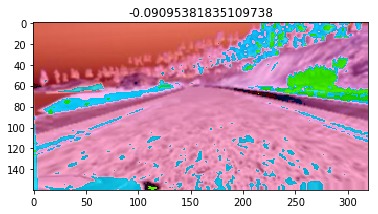

In [6]:
features=[]
labels=[]
for data in dataset:
    feature, label = load_and_augment_image(data)
    features.append(feature)
    labels.append(label)

idx = np.random.randint(0,len(dataset))
plt.imshow(features[idx])
plt.title(labels[idx])